## PaddleHub

通过预训练模型应用工具PaddleHub，可以便捷地获取PaddleHub生态下的预训练模型，完成模型的管理和一键预测。配合使用Fine-tune API，可以基于大规模预训练模型快速完成迁移学习，让预训练模型能更好地服务于用户特定场景的应用。

**预训练模型的应用背景**

深度学习依赖较多的数据完成神经网络训练，有两种方式可以解决训练数据不足的问题：
- 多任务学习与迁移学习
- 自监督学习

In [5]:
import paddle
import paddlehub as hub

import cv2
import matplotlib.pyplot as plt

## PaddleHub使用示例 - 街景动漫化

In [4]:
# 加载要使用的预训练模型
model = hub.Module(name='animegan_v2_hayao_64')

Download https://bj.bcebos.com/paddlehub/paddlehub_dev/animegan_v2_hayao_64_1_1_0.zip
[##################################################] 100.00%
Decompress /Users/neowong/.paddlehub/tmp/tmp2vha0jqz/animegan_v2_hayao_64_1_1_0.zip
[##################################################] 100.00%

[2022-11-10 14:07:24,985] [    INFO] - Successfully installed animegan_v2_hayao_64-1.1.0


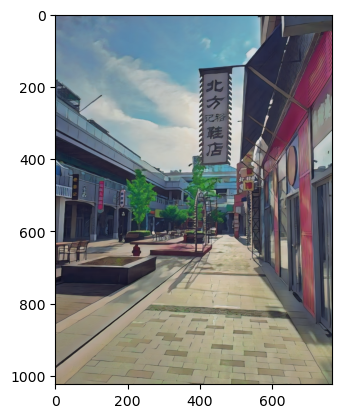

In [6]:
# 模型预测
result = model.style_transfer(images=[cv2.imread('../datasets/street.jpg')])
plt.imshow(result[0][:,:,[2,1,0]])
plt.show()

## 快速使用PaddleHub

In [10]:
# 中文分词
lac = hub.Module(name='lac')

test_text = ['对于自然语言处理任务，下面以中文分词和情感分类的任务为例，待处理的数据以函数参数的形式传入。']

res = lac.lexical_analysis(texts=test_text)

print('中文词法分析结果：', res)

中文词法分析结果： [{'word': ['对于', '自然语言处理', '任务', '，', '下面', '以', '中文', '分词', '和', '情感', '分类', '的', '任务', '为', '例', '，', '待', '处理', '的', '数据', '以', '函数', '参数', '的', '形式', '传入', '。'], 'tag': ['p', 'nz', 'n', 'w', 'f', 'p', 'nz', 'n', 'c', 'n', 'vn', 'u', 'n', 'v', 'n', 'w', 'v', 'vn', 'u', 'n', 'p', 'n', 'n', 'u', 'n', 'v', 'w']}]


In [12]:
# 情感分类
senta = hub.Module(name='senta_bilstm')

test_text = ['味道不错，确实不算太辣，适合不能吃辣的人。就在长江边上，抬头就能看到长江的风景。鸭肠、黄鳝都比较新鲜。']

res = senta.sentiment_classify(texts=test_text)

print('中文词法分析结果：', res)

[2022-11-10 14:56:38,425] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object


中文词法分析结果： [{'text': '味道不错，确实不算太辣，适合不能吃辣的人。就在长江边上，抬头就能看到长江的风景。鸭肠、黄鳝都比较新鲜。', 'sentiment_label': 1, 'sentiment_key': 'positive', 'positive_probs': 0.9771, 'negative_probs': 0.0229}]
